## 비지도 학습의 개요

비지도 학습(Unsupervised Learning)은 기계 학습의 일종으로, 데이터가 어떻게 구성되었는지를 알아내는 문제의 범주에 속한다. 
이 방법은 지도 학습(Supervised Learning) 혹은 강화 학습(Reinforcement Learning)과는 달리 **입력값에 대한 목표치가 주어지지 않는다**. (y값이 없다.)

- 차원 축소: PCA, LDA, SVD
- 군집화: KMeans Clustering, DBSCAN
- 군집화 평가

## 차원 축소

- feature의 갯수를 줄이는 것을 뛰어 넘어, 특징을 추출하는 역할을 하기도 함.
- 계산 비용을 감소하는 효과
- 전반적인 데이터에 대한 이해도를 높이는 효과

In [4]:
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd

### 데이터 로드 (iris 데이터)

In [5]:
iris = datasets.load_iris()
data = iris['data']
df = pd.DataFrame(data, columns=iris['feature_names'])
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## PCA 차원축소

주성분 분석 (PCA) 는 선형 차원 축소 기법입니다. 매우 인기 있게 사용되는 차원 축소 기법중 하나입니다.

주요 특징중의 하나는 **분산(variance)을 최대한 보존**한다는 점입니다.

[PCA의 원리에 관련된 블로그글](https://excelsior-cjh.tistory.com/167)

- components에 1보다 작은 값을 넣으면, 분산을 기준으로 차원 축소
- components에 1보다 큰 값을 넣으면, 해당 값을 기준으로 feature를 축소

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2) #feature를 2개로 축소

In [8]:
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

In [9]:
pca_data = pca.fit_transform(data_scaled)

In [10]:
data_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [11]:
pca_data[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

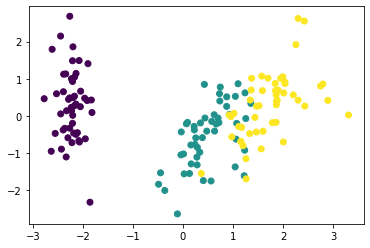

In [13]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'])

In [14]:
pca = PCA(n_components=0.99) # 얘는 분산 유지

In [15]:
pca_data = pca.fit_transform(data_scaled)

In [16]:
pca_data[:5]

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ]])

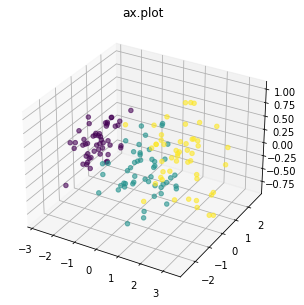

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

sample_size = 50
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], alpha=0.6, c=df['target'])
plt.savefig('./tmp.svg')
plt.title("ax.plot")
plt.show()

## LDA 차원 축소

LDA(Linear Discriminant Analysis): 선형 판별 분석법 (PCA와 유사)

- LDA는 클래스(Class) 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 내부 분산의 비율을 최대화 하는 방식으로 차원 축소합니다.

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [19]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [21]:
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

In [22]:
lda_data = lda.fit_transform(data_scaled, df['target'])

In [23]:
lda_data[:5]

array([[ 8.06179978,  0.30042062],
       [ 7.12868772, -0.78666043],
       [ 7.48982797, -0.26538449],
       [ 6.81320057, -0.67063107],
       [ 8.13230933,  0.51446253]])

시각화

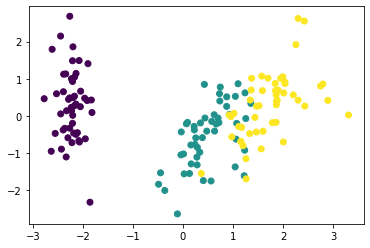

In [24]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'])

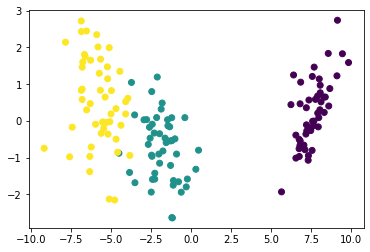

In [25]:
plt.scatter(lda_data[:, 0], lda_data[:, 1], c=df['target'])

### SVD (Singular Value Decomposition)

- 상품의 추천 시스템에도 활용되어지는 알고리즘 (추천시스템)
- 특이값 분해기법입니다. 
- PCA와 유사한 차원 축소 기법입니다. 
- scikit-learn 패키지에서는 truncated SVD (aka LSA)을 사용합니다.


In [26]:
from sklearn.decomposition import TruncatedSVD

In [27]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

In [30]:
svd = TruncatedSVD(n_components=2)

In [31]:
svd_data = svd.fit_transform(data_scaled)

시각화

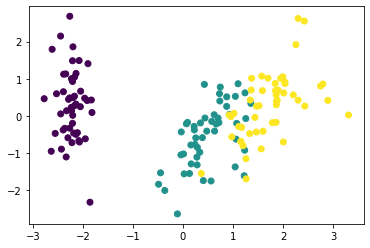

In [32]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'])

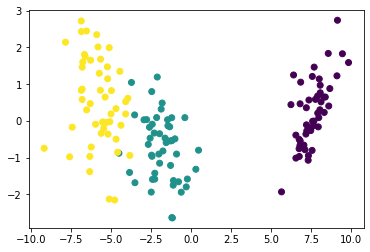

In [33]:
plt.scatter(lda_data[:, 0], lda_data[:, 1], c=df['target'])

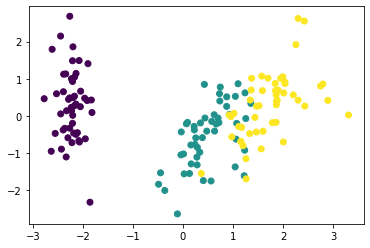

In [34]:
plt.scatter(svd_data[:, 0], svd_data[:, 1], c=df['target'])

## 군집화

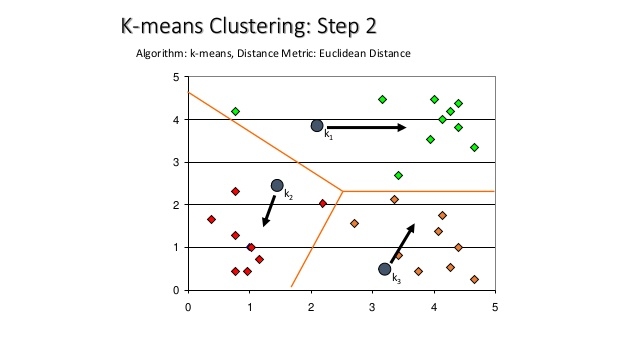

In [35]:
Image('https://image.slidesharecdn.com/patternrecognitionbinoy-06-kmeansclustering-160317135729/95/pattern-recognition-binoy-k-means-clustering-13-638.jpg')

### K-Means Clustering

[K-Means 알고리즘](https://ko.wikipedia.org/wiki/K-%ED%8F%89%EA%B7%A0_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)

군집화에서 가장 대중적으로 사용되는 알고리즘입니다. centroid라는 중점을 기준으로 가장 가까운 포인트들을 선택하는 군집화 기법입니다.

**사용되는 예제**

- 스팸 문자 분류
- 뉴스 기사 분류

In [37]:
from sklearn.cluster import KMeans

In [38]:
kmeans = KMeans(n_clusters=3)

In [39]:
cluster_data = kmeans.fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

In [40]:
cluster_data[:5]

array([[5.0595416 , 0.14135063, 3.41925061],
       [5.11494335, 0.44763825, 3.39857426],
       [5.27935534, 0.4171091 , 3.56935666],
       [5.15358977, 0.52533799, 3.42240962],
       [5.10433388, 0.18862662, 3.46726403]])

In [41]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

<AxesSubplot:ylabel='count'>

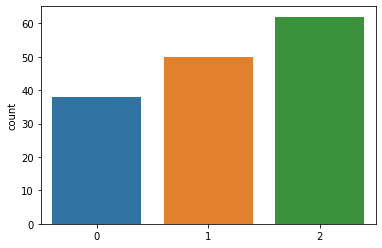

In [43]:
sns.countplot(kmeans.labels_)

<AxesSubplot:xlabel='target', ylabel='count'>

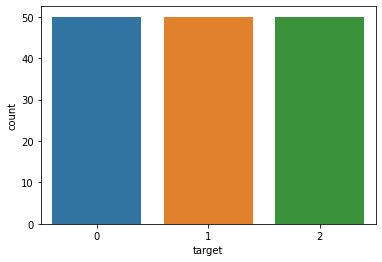

In [44]:
sns.countplot(df['target'])

In [45]:
kmeans

KMeans(n_clusters=3)

<AxesSubplot:ylabel='count'>

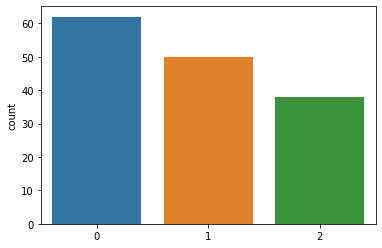

In [48]:
kmeans = KMeans(n_clusters=3, max_iter=500)
cluster_data = kmeans.fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])
sns.countplot(kmeans.labels_)

## DBSCAN (Density-based spatial clustering of applications with noise)

밀도 기반 클러스터링

- 밀도가 높은 부분을 클러스터링 하는 방식
- 어느점을 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식
- KMeans 에서는 n_cluster의 갯수를 반드시 지정해 주어야 하나, DBSCAN에서는 필요없음
- 기하학적인 clustering도 잘 찾아냄


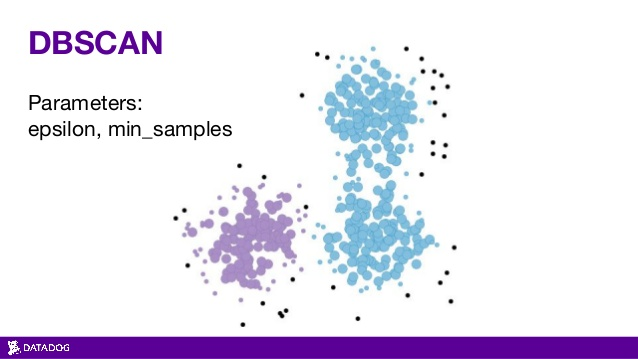

In [49]:
Image('https://image.slidesharecdn.com/pydatanyc2015-151119175854-lva1-app6891/95/pydata-nyc-2015-automatically-detecting-outliers-with-datadog-26-638.jpg')

In [50]:
from sklearn.cluster import DBSCAN

In [60]:
dbscan = DBSCAN(eps=0.6, min_samples=2)

In [61]:
dbscan_data = dbscan.fit_predict(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

In [62]:
dbscan_data

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  3,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

## 실루엣 스코어 (군집화 평가)

클러스터링의 품질을 정량적으로 평가해 주는 지표

- 1: 클러스터링의 품질이 좋다
- 0: 클러스터링의 품질이 안좋다 (클러스터링의 의미 없음)
- 음수: 잘못 분류됨

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [55]:
score = silhouette_score(data_scaled, kmeans.labels_)

In [56]:
score

0.44366157397640527

In [57]:
samples = silhouette_samples(data_scaled, kmeans.labels_)

In [58]:
samples[:5]

array([0.73318987, 0.57783809, 0.68201014, 0.62802187, 0.72693222])